In [1]:
import pandas as pd

zinc_arm = pd.read_csv('../zinc250k_arm.csv', nrows=100)
zinc_linker = pd.read_csv('../zinc250k_linker.csv', nrows=100)

print(zinc_arm.head())
print(zinc_linker.head())

   idx                                               safe   
0    0        c15ccccc1F.C4C(=O)N5.CC(C)(C)c1ccc2occ4c2c1  \
1    0        CC(C)(C)c1ccc2occ4c2c1.C4C(=O)N5.c15ccccc1F   
2    1    c14cncc5c1.c15nncn1C.C[C@@H]1CC(N4)C[C@@H](C)C1   
3    1    C[C@@H]1CC(N4)C[C@@H](C)C1.c14cncc5c1.c15nncn1C   
4    2  O4[C@H]5C(=O)N1CCCC1.c15ccccc1.N#Cc1ccc(-c2ccc...   

                        frag   
0   *c1coc2ccc(C(C)(C)C)cc12  \
1                 *c1ccccc1F   
2  *NC1C[C@@H](C)C[C@H](C)C1   
3                  *c1nncn1C   
4  *c1ccc(-c2ccc(C#N)cc2)cc1   

                                                 fps  
0  <rdkit.DataStructs.cDataStructs.ExplicitBitVec...  
1  <rdkit.DataStructs.cDataStructs.ExplicitBitVec...  
2  <rdkit.DataStructs.cDataStructs.ExplicitBitVec...  
3  <rdkit.DataStructs.cDataStructs.ExplicitBitVec...  
4  <rdkit.DataStructs.cDataStructs.ExplicitBitVec...  
   idx                                               safe   
0    0        CC(C)(C)c1ccc2occ4c2c1.c15ccccc1F.C

In [2]:
from rdkit import Chem
from rdkit.Chem import rdFingerprintGenerator

mfpgen = rdFingerprintGenerator.GetMorganGenerator(radius=2,fpSize=1024)

zinc_arm['fps'] = [mfpgen.GetFingerprint(Chem.MolFromSmiles(x)) for x in zinc_arm['frag']]
zinc_linker['fps'] = [mfpgen.GetFingerprint(Chem.MolFromSmiles(x)) for x in zinc_linker['frag']]

In [3]:
zinc_arm

,idx,safe,frag,fps
0,0,c15ccccc1F.C4C(=O)N5.CC(C)(C)c1ccc2occ4c2c1,*c1coc2ccc(C(C)(C)C)cc12,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,0,CC(C)(C)c1ccc2occ4c2c1.C4C(=O)N5.c15ccccc1F,*c1ccccc1F,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
2,1,c14cncc5c1.c15nncn1C.C[C@@H]1CC(N4)C[C@@H](C)C1,*NC1C[C@@H](C)C[C@H](C)C1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
3,1,C[C@@H]1CC(N4)C[C@@H](C)C1.c14cncc5c1.c15nncn1C,*c1nncn1C,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,2,O4[C@H]5C(=O)N1CCCC1.c15ccccc1.N#Cc1ccc(-c2ccc...,*c1ccc(-c2ccc(C#N)cc2)cc1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...
95,56,c13cc(Br)cc(F)c1C(N)=O.CN3CC2.c12ccc(F)cc1,*c1ccc(F)cc1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
96,57,COc1ccccc13.N3C(=O)CS4.c14ccc(-c2ccccc2OC)nn1,*c1ccc(-c2ccccc2OC)nn1,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
97,57,c14ccc(-c2ccccc2OC)nn1.N3C(=O)CS4.COc1ccccc13,*c1ccccc1OC,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
98,58,C2(=O)/C(C#N)=C\3.Cc1occc12.c13cccc(C(F)(F)F)c1,*c1cccc(C(F)(F)F)c1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [4]:
slicer_params = {'shortest_linker': True}

In [5]:
#from preprocess import parallel_decompose, parallel_similarity

In [6]:
from rdkit.Chem import Draw

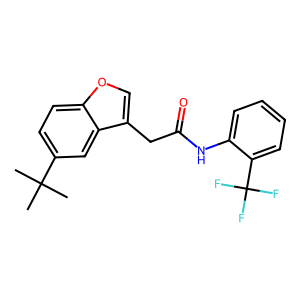

In [7]:
Draw.MolToImage(Chem.MolFromSmiles('CC(C)(C)c1ccc2occ(CC(=O)Nc3ccccc3C(F)(F)F)c2c1'))

In [8]:
from similarity_worker import compute_similarity, attach
zinc_arm_sim = compute_similarity([zinc_arm, zinc_arm, 10, 'arm', slicer_params])

/nas/longleaf/home/shuhang/miniconda3/envs/f-rag/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


rest_decoded: c1(NC(C[*:4])=O)ccccc1F
rest_att: c1(NC(C[1*])=O)ccccc1F
most_similar_frag: [1*]c1coc2cc(C)ccc12
attached_smiles: Cc1ccc2c(CC(=O)Nc3ccccc3F)coc2c1
rest_decoded: CC(C)(C)c1ccc2occ(CC(=O)N[*:5])c2c1
rest_att: CC(C)(C)c1ccc2occ(CC(=O)N[1*])c2c1
most_similar_frag: [1*]c1ccccc1C(F)(F)F
attached_smiles: CC(C)(C)c1ccc2occ(CC(=O)Nc3ccccc3C(F)(F)F)c2c1
rest_decoded: c1([*:4])cncc(-c2nncn2C)c1
rest_att: c1([1*])cncc(-c2nncn2C)c1
most_similar_frag: [1*]C1CCC(C)CC1
attached_smiles: CC1CCC(c2cncc(-c3nncn3C)c2)CC1
rest_decoded: C[C@@H]1CC(Nc2cncc([*:5])c2)C[C@@H](C)C1
rest_att: C[C@@H]1CC(Nc2cncc([1*])c2)C[C@@H](C)C1
most_similar_frag: [1*]c1cc(CCC)nn1C
attached_smiles: CCCc1cc(-c2cncc(NC3C[C@@H](C)C[C@H](C)C3)c2)n(C)n1
rest_decoded: O([C@@H](C(=O)N1CCCC1)c1ccccc1)[*:4]
rest_att: O([C@@H](C(=O)N1CCCC1)c1ccccc1)[1*]
most_similar_frag: [1*]c1cc(C#N)ccc1C
attached_smiles: Cc1ccc(C#N)cc1O[C@@H](C(=O)N1CCCC1)c1ccccc1
rest_decoded: N#Cc1ccc(-c2ccc(O[C@@H](C(=O)N3CCCC3)[*:5])cc2)cc1
rest_att: